# Análise exploratória de dados

In [1]:
import pandas as pd

In [3]:
# importando os dados

data = pd.read_csv('../data/raw/simplified_coffee.csv')
data.head()

,name,roaster,roast,loc_country,origin_1,origin_2,100g_USD,rating,review_date,desc_1,desc_2,desc_3
0,“Sweety” Espresso Blend,A.R.C.,Medium-Light,Hong Kong,Panama,Ethiopia,14.32,95,November 2017,"Evaluated as espresso. Sweet-toned, deeply ric...",An espresso blend comprised of coffees from Pa...,A radiant espresso blend that shines equally i...
1,Flora Blend Espresso,A.R.C.,Medium-Light,Hong Kong,Africa,Asia Pacific,9.05,94,November 2017,"Evaluated as espresso. Sweetly tart, floral-to...",An espresso blend comprised of coffees from Af...,"A floral-driven straight shot, amplified with ..."
2,Ethiopia Shakiso Mormora,Revel Coffee,Medium-Light,United States,Guji Zone,Southern Ethiopia,4.70,92,November 2017,"Crisply sweet, cocoa-toned. Lemon blossom, roa...",This coffee tied for the third-highest rating ...,"A gently spice-toned, floral- driven wet-proce..."
3,Ethiopia Suke Quto,Roast House,Medium-Light,United States,Guji Zone,Oromia Region,4.19,92,November 2017,"Delicate, sweetly spice-toned. Pink peppercorn...",This coffee tied for the third-highest rating ...,Lavender-like flowers and hints of zesty pink ...
4,Ethiopia Gedeb Halo Beriti,Big Creek Coffee Roasters,Medium,United States,Gedeb District,Gedeo Zone,4.85,94,November 2017,"Deeply sweet, subtly pungent. Honey, pear, tan...",Southern Ethiopia coffees like this one are pr...,A deeply and generously lush cup saved from se...


## 1. Descrição dos dados

In [3]:
data.describe()

,100g_USD,rating
count,2095.000000,2095.000000
mean,9.323313,93.114081
std,11.430659,1.563024
min,0.120000,84.000000
25%,4.930000,92.000000
50%,5.860000,93.000000
75%,8.785000,94.000000
max,132.280000,98.000000


In [5]:
data.shape

(2095, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2095 entries, 0 to 2094
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         2095 non-null   object 
 1   roaster      2095 non-null   object 
 2   roast        2080 non-null   object 
 3   loc_country  2095 non-null   object 
 4   origin_1     2095 non-null   object 
 5   origin_2     2095 non-null   object 
 6   100g_USD     2095 non-null   float64
 7   rating       2095 non-null   int64  
 8   review_date  2095 non-null   object 
 9   desc_1       2095 non-null   object 
 10  desc_2       2095 non-null   object 
 11  desc_3       2093 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 196.5+ KB


Das duas células acima, podemos ver que o dataset possui 2095 linhas (instâncias) e 12 colunas (features). Podemos ver também que esse dataset tem dados faltantes para o atributo "roast" (torra) e no atributo "desc_3".

O atributo torra possui 15 valores faltantes,  
O atributo desc_3 possui 2 valores faltantes.


Os valores faltantes para o atributo_3 são pouco relevantes pois os outros dois atributos de descrição estão completos.


Conseguimos ver o preço médio dos grãos de café (USD 9,32) e que 75% dos dados possuem valor até USD 8,78 mas o café de maior valor custa USD 132,28, o que pode ser um outlier.    
Em relação às notas das avaliações temos uma amplitude de 14 pontos e a distância inter-quartil (IQR) é de apenas 2 pontos, o que pode mostrar que os cafés tem notas altas que variam pouco, por ter alta qualidade.

In [10]:
# Calculando a porcentagem de dados faltantos

dados_faltantes_roast = data['roast'].isnull().sum()
porcentagem_dados_faltantes = (dados_faltantes_roast / 2095) * 100
porcentagem_dados_faltantes

0.7159904534606205

Ou seja, temos 7% de dados faltantes nessa coluna. Por ser um valor baixo, podemos retirar essas linhas.

### Vamos avaliar quais tipos de torra e quais países são produtos do grão.

In [11]:
torras = data['roast'].unique()
torras

array(['Medium-Light', 'Medium', 'Light', 'Medium-Dark', nan, 'Dark'],
      dtype=object)

In [14]:
paises = data['origin_2'].unique()
len(paises)

357

## 2. Perguntas de partida e hipóteses

De acordo com nossos objetivos, vamos tentar identificar:
* Preferência de torra,
* Se a nota influencia no preço,
* Qual país possui mais grãos bem avaliados,
* Se o local de venda do café influencia o preço.

Nossas hipóteses são:
* Os cafés preferidos são os de torra média (Medium, Medium-Light, Medium-Dark),
* A nota influência sim no preço, quanto maior a nota mais caro será o café,
* O país com os melhores grão são Etiópia, Colômbia, Costa Rica e Brasil.
* O local de venda influencia sim o preço, quanto mais distante do local do produção, mais caro.

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 0, 'Tipo de torra')

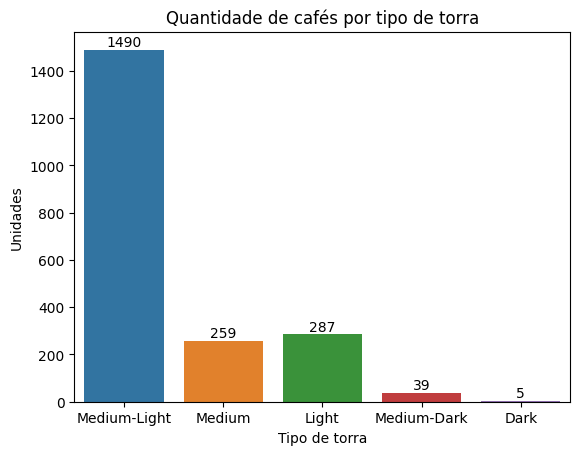

In [27]:
ax = sns.countplot(data=data, x='roast')
ax.bar_label(ax.containers[0])
plt.title("Quantidade de cafés por tipo de torra")
plt.ylabel("Unidades")
plt.xlabel("Tipo de torra")

In [45]:
medium_light = (data['roast'] == "Medium-Light").sum()
others =  (data['roast']).count()
percentage_medium_light = (medium_light / others) * 100
percentage_medium_light

71.63461538461539

Pode-se perceber que a torra mais produzida é a torra medium-light, com 1490 cafés, correspondendo a 71,6% do tipo de torra produzido.  

Text(0.5, 0, 'Nota')

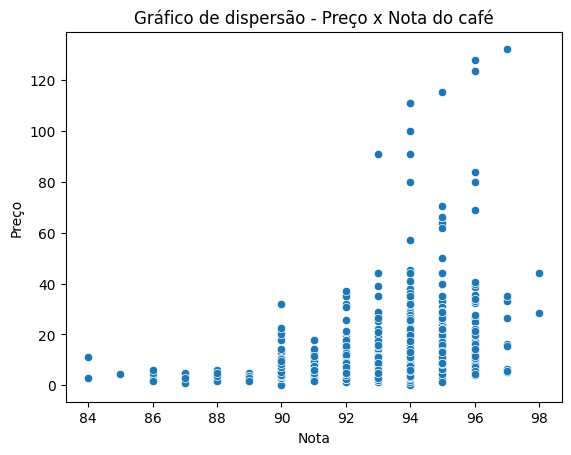

In [47]:
sns.scatterplot(data=data, x='rating', y='100g_USD')
plt.title("Gráfico de dispersão - Preço x Nota do café")
plt.ylabel("Preço")
plt.xlabel("Nota")

Aparentemente, a nota não influencia de maneira significativa no preço. A maioria dos café aparentam estar abaixo de 50 dólares (100g).

Text(0, 0.5, 'Local da venda')

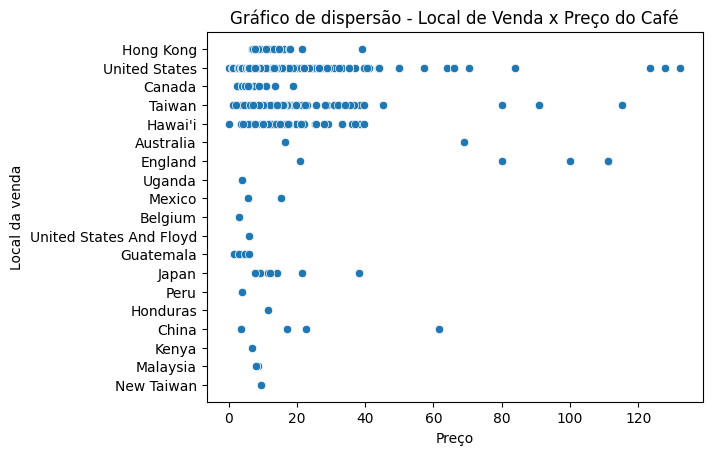

In [57]:
sns.scatterplot(data=data, y='loc_country', x='100g_USD')
plt.title("Gráfico de dispersão - Local de Venda x Preço do Café")
plt.xlabel("Preço")
plt.ylabel("Local da venda")

Esse gráfico já pode sugerir que o preço pode estar relacionado com o local da venda, uma vez que os grãos mais caros estão em países mais desenvolvidos e não produtores de café (Taiwan, Estados Unidos, Inglaterra)

Dessa forma, o próximo passo é determinar onde estão os cafés mais caros. Nesse momento, vamos definir como caro os cafés acimas de 40 dálores/100g. Lembrando que da nossa análise inicial temos que 75% dos cafés tem preço menor ou igual a USD 8.785.

In [62]:
expansive_coffee = data[data['100g_USD'] >= 40]
expansive_coffee.describe()

,100g_USD,rating
count,37.000000,37.000000
mean,74.997297,94.648649
std,28.980139,1.183597
min,40.560000,93.000000
25%,44.090000,94.000000
50%,69.000000,95.000000
75%,90.830000,95.000000
max,132.280000,98.000000


Vamos repetir as análises feitas:
* Qual é o tipo de torra dos cafés mais caro?
* O preço está associado com a nota dos cafés mais caros?
* Onde são vendidos os cafés mais caros?

Text(0.5, 0, 'Tipo de torra')

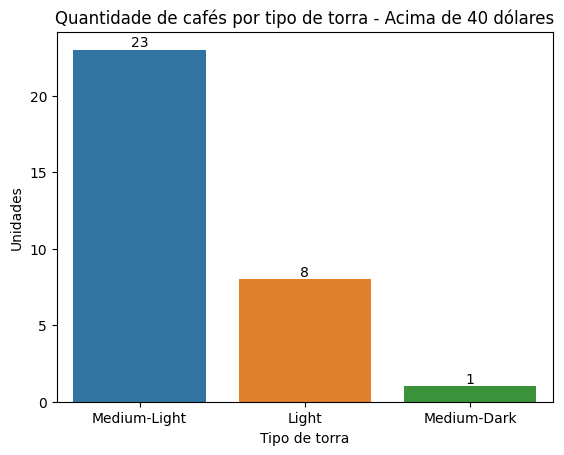

In [64]:
ax = sns.countplot(data=expansive_coffee, x='roast')
ax.bar_label(ax.containers[0])
plt.title("Quantidade de cafés por tipo de torra - Acima de 40 dólares")
plt.ylabel("Unidades")
plt.xlabel("Tipo de torra")

Descobrimos que entre os cafés mais caros, nem a torra Medium nem a torra Dark estão presentes, o que pode sugerir que os cafés mais medianos/leves são preferidos.

In [63]:
medium_light = (expansive_coffee['roast'] == "Medium-Light").sum()
others =  (expansive_coffee['roast']).count()
percentage_medium_light = (medium_light / others) * 100
percentage_medium_light

71.875

Text(0, 0.5, 'Local da venda')

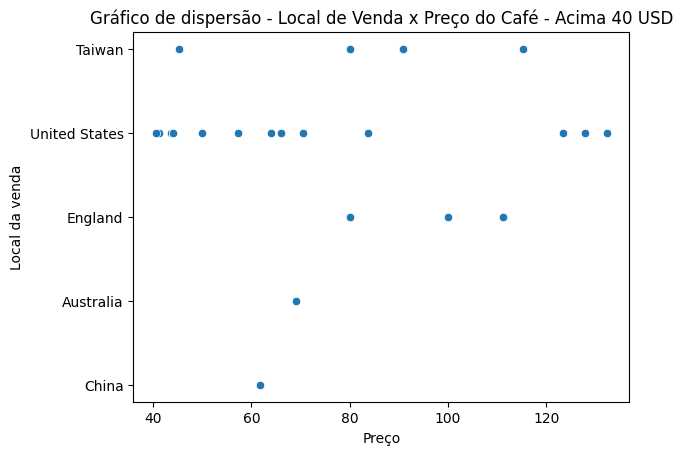

In [65]:
sns.scatterplot(data=expansive_coffee, y='loc_country', x='100g_USD')
plt.title("Gráfico de dispersão - Local de Venda x Preço do Café - Acima 40 USD")
plt.xlabel("Preço")
plt.ylabel("Local da venda")

### Agora, vamos ver quantos países produtores distintos a base possui e em quantos países esses vendedores estão localizados. Depois vamos repetir as analises para os cafés mais caros.

In [49]:
paises_produtores_1 = data['origin_1'].unique()
paises_produtores_2 = data['origin_2'].unique()
paises_vendedores = data['loc_country'].unique()
print(f'Existem {len(paises_produtores_1)} países produtores principais e \n{len(paises_produtores_2)} países produtores secundários.\n')
print(f'Existem {len(paises_vendedores)} países que vendem esses cafés')


Existem 614 países produtores principais e 
357 países produtores secundários.

Existem 19 países que vendem esses cafés


Do resultado acima, pode-se garantir que as localidades não são países exclusivamente. No mundo existem cerca de 206 países, sendo 195 reconhecidos pela ONU. Fonte: [Quantos países tem no mundo](https://www.melhoresdestinos.com.br/quantos-paises-mundo.html)

<Axes: xlabel='origin_1'>

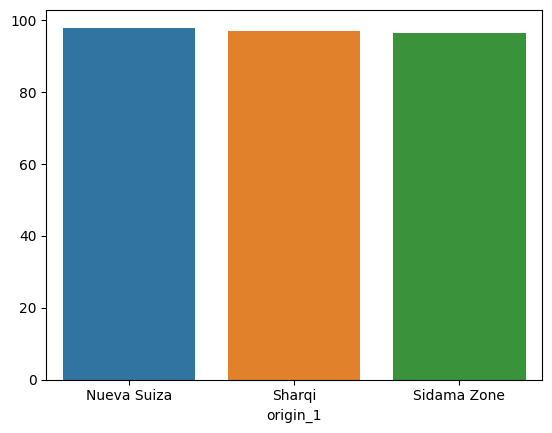

In [72]:
media_notas = data.groupby('origin_1')['rating'].mean()
top_5_paises = media_notas.nlargest(3)
sns.barplot(x=top_5_paises.index, y=top_5_paises.values)


In [73]:
paises_produtores_1 = expansive_coffee['origin_1'].unique()
paises_produtores_2 = expansive_coffee['origin_2'].unique()
paises_vendedores = expansive_coffee['loc_country'].unique()
print('Entre os cafés mais caros temos: ')
print(f'Existem {len(paises_produtores_1)} lugares produtores principais e \n{len(paises_produtores_2)} lugares produtores secundários.\n')
print(f'Existem {len(paises_vendedores)} países que vendem esses cafés')

Entre os cafés mais caros temos: 
Existem 20 lugares produtores principais e 
18 lugares produtores secundários.

Existem 5 países que vendem esses cafés


<Axes: xlabel='origin_1'>

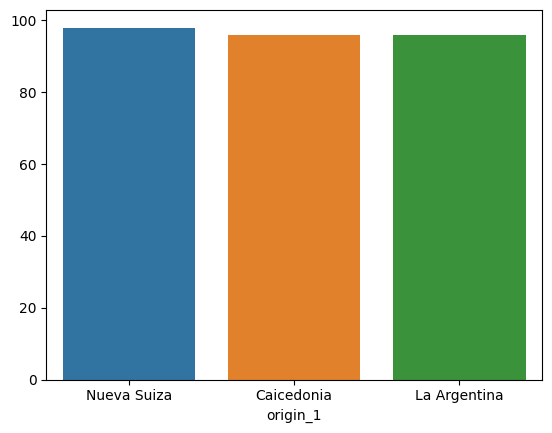

In [68]:
media_notas = expansive_coffee.groupby('origin_1')['rating'].mean()
top_5_paises = media_notas.nlargest(3)
sns.barplot(x=top_5_paises.index, y=top_5_paises.values)

Podemos repetir essa análise, considerando as maiores notas. Das 2095 avaliações, vamos analisar as 5% maiores notas.

In [74]:
0.05*2095

104.75

In [77]:
bigger_scores = data.nlargest(105, 'rating')
bigger_scores.describe()

,100g_USD,rating
count,105.000000,105.000000
mean,21.196476,95.895238
std,24.000431,0.649316
min,3.890000,95.000000
25%,6.230000,96.000000
50%,14.320000,96.000000
75%,26.460000,96.000000
max,132.280000,98.000000


É interessante perceber que entre as maiores notas, 75% dos cafés possuem valor menor ou igual a 26,46 USD, o que mostra que as maiores notas não são, necessariamente, dos cafés mais caros.  
Vamos observar a torra dos cafés de maior nota:

Text(0.5, 0, 'Tipo de torra')

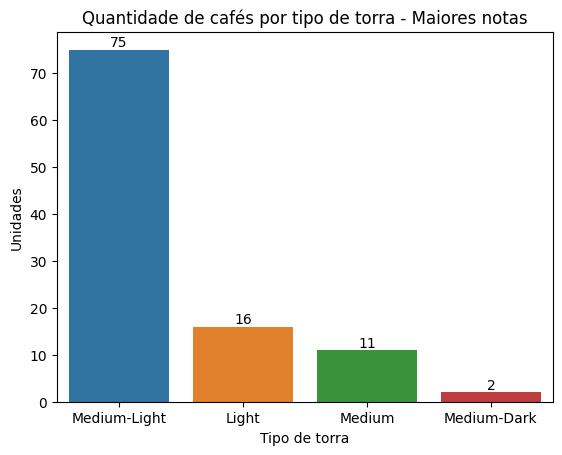

In [79]:
ax = sns.countplot(data=bigger_scores, x='roast')
ax.bar_label(ax.containers[0])
plt.title("Quantidade de cafés por tipo de torra - Maiores notas")
plt.ylabel("Unidades")
plt.xlabel("Tipo de torra")

Podemos ver que, diferente do preço, nas maiores notas temos cafés de todos os tipos de torra, com predominancia da torra medium-light.  
Por fim, vamos olhar os países dos melhores cafés:

## 3. Insights